# Teoria - Regressão Linear

#### Source: An Introduction to Statistical Learning (With Applications in R)

A Regressão Linear é um método de machine learning de aprendizado supervisionado utilizado para prever uma resposta quantitativa de (Y) com base em um único preditor (X). Ela assume que a relação entre estas duas variáveis é aproximadamente linear. A equação que define o algoritmo é dada pela equação da reta:

$$Y = B0 + B1*X$$

O Coeficiente (B0) de intersecção da reta com o eixo Y, é determinado por:

$$B0 = \overline{Y} - B1*\overline{X}$$

O Coeficiente angular da reta (B1), que determina a inclinação desta, é determinado por:

$$B1 = \frac{\sum (X_i-\overline{X})(Y_i-\overline{Y})}{\sum (X_i-\overline{X})^2}$$

Sendo:

- $X$ = Variável Independente;
- $Y$ = Variável Dependente;
- $\overline{X}$ = Representa a Média de $X$;
- $\overline{Y}$ = Representa a Média de $Y$;
- $B0$ = Coeficiente de Intersecção da Reta;
- $B1$ = Coeficiente Angular da Reta;



## Carregando as Bibliotecas e os Dados

Para ilustrarmos os algoritmos e a teoria de regressão linear, iremos utilizar o dataset CalCOFI, onde poderemos analisar o comportamento da salinidade da água em relação a sua temperatura.

Link: https://www.kaggle.com/sohier/calcofi/data

In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [109]:
data = pd.read_csv(r'/home/rafaelpavan95/anaconda3/bottle.csv')
reg_df = data[['T_degC','Salnty']]
reg_df = reg_df[:][:500]
reg_df.fillna(method='ffill', inplace=True)
reg_df.head()

,T_degC,Salnty
0,10.50,33.440
1,10.46,33.440
2,10.46,33.437
3,10.45,33.420
4,10.45,33.421


In [110]:
X,Y = reg_df['T_degC'].values.reshape(-1, 1), reg_df['Salnty'].values.reshape(-1, 1)

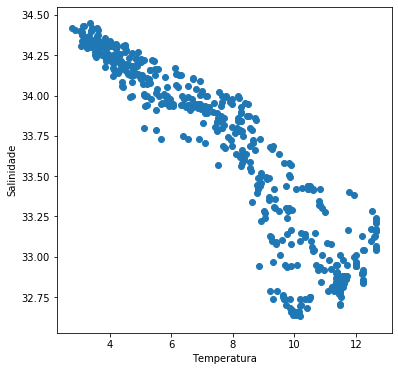

In [111]:
plt.figure(figsize=(6, 6))
plt.scatter(X, Y)
plt.xlabel('Temperatura')
plt.ylabel('Salinidade')
plt.show()

## Implementando o Algoritmo de Regressão

In [112]:
class LinearReg():
    def __init__(self):
        
        self.b0 = 0.0
        self.b1 = 0.0
    
    def fit(self, X, Y):
        
        x1 = (X - np.mean(X))
        y1 = (Y - np.mean(Y))
        
        self.B1 = (np.sum(x1*y1))/(np.sum(x1*x1))
        self.B0 = np.mean(Y) - (self.B1 * np.mean(X))
    
    def predict(self, X):
        
        return self.B0 + self.B1*X

## Testando

Text(0, 0.5, 'Salinidade')

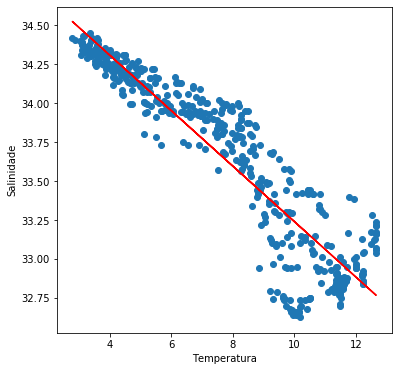

In [113]:
reg=LinearReg()
reg.fit(X,Y)
plt.figure(figsize=(6, 6))
plt.scatter(X, Y)
plt.plot(X, reg.predict(X), c='red')
plt.xlabel('Temperatura')
plt.ylabel('Salinidade')

In [114]:
print('B0: {} B1: {}'.format(reg.B0, reg.B1))

B0: 35.01967663686463 B1: -0.17797651118942892


## Comparando com o Algoritmo do Scikit-Learn

Text(0, 0.5, 'Salinidade')

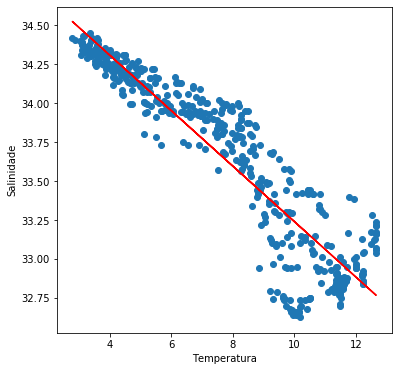

In [115]:
reg2 = LinearRegression()
reg2.fit(X, Y)
plt.figure(figsize=(6, 6))
plt.scatter(X, Y)
plt.plot(X, reg2.predict(X), c='red')
plt.xlabel('Temperatura')
plt.ylabel('Salinidade')

In [116]:
print('B0: {} B1: {}'.format(reg2.intercept_, reg2.coef_))

B0: [35.01967664] B1: [[-0.17797651]]


Podemos observar que a regressão implementada com a equação teórica, apresenta o mesmo resultado que a implementada através da biblioteca do Scikit-Learn.

## Indicadores

### R²  

O coeficiente de determinação, também chamado de R², é uma medida de ajuste de um modelo estatístico linear generalizado, como a regressão linear simples ou múltipla, aos valores observados de uma variável aleatória. O R² varia entre 0 e 1, por vezes sendo expresso em termos percentuais. Nesse caso, expressa a quantidade da variância dos dados que é explicada pelo modelo linear. Assim, quanto maior o R², mais explicativo é o modelo linear, ou seja, melhor ele se ajusta à amostra. Por exemplo, um R² = 0,90 significa que o modelo linear explica 90,00 % da variância da variável dependente a partir do regressores (variáveis independentes) incluídas naquele modelo linear. 

In [120]:
r2_score(Y, reg2.predict(X))

0.8486664979080796

### MSE - Mean Squared Error

O erro quadrático médio é definido como sendo a média da diferença entre o valor do estimador e do parâmetro ao quadrado. Esta métrica sobrestima quão ruim o seu modelo é, pois até mesmos os erros pequenos são penalizados. Quanto menor o erro quadrático médio (mais próximo de 0), melhor. 

In [121]:
mean_squared_error(Y, reg2.predict(X))

0.04769173355966501

### MAE - Mean Absolute Error


É a diferença absoluta entre o valor real e o valor previsto pelo modelo de regressão linear. Ele é menos sensível aos "outliers". É uma métrica linear, o que significa que todas as diferenças são penalizadas igualmente. Não se deve aplicar em ocasiões onde se queira prestar atenção aos "outliers".

In [135]:
mean_absolute_error(Y,reg2.predict(X))

0.16425945296598685

### RMSE - Root Mean Squared Error

RMSE nada mais é do que a raiz quadrada do erro quadrático médio entre o valor real e o valor previsto pelo modelo. Em alguns casos é preferível utilizar tal métrica pois os erros são primeiramente elevados ao quadrado para depois ser calculada a média, o que acarreta em uma alta penalidade em erros grandes. É mais útil para quando se quer prestar atenção nos maiores erros.

In [137]:
np.sqrt(mean_squared_error(Y, reg2.predict(X)))

0.21838437114332382